# Importing Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

# Project:
## Job Roles Burnout EDA Analysis:

In [210]:
df=pd.read_csv(r"c:\Users\user\Desktop\Kaggle Datasets\synthetic_employee_burnout.csv")

# Data Info

In [211]:
df.head()

,Name,Age,Gender,JobRole,Experience,WorkHoursPerWeek,RemoteRatio,SatisfactionLevel,StressLevel,Burnout
0,Max Ivanov,32,Male,Analyst,3,60,21,4.40,1,0
1,Max Wang,40,Female,Engineer,9,47,67,2.09,2,0
2,Nina Petrov,33,Female,Engineer,2,44,20,2.58,3,0
3,John Ivanov,35,Female,Manager,6,44,70,3.23,8,0
4,John Wang,59,Male,Sales,8,38,46,4.41,1,0


In [212]:
df.tail()

,Name,Age,Gender,JobRole,Experience,WorkHoursPerWeek,RemoteRatio,SatisfactionLevel,StressLevel,Burnout
1995,Leo Brown,41,Female,Manager,4,63,17,3.40,4,0
1996,Alex Brown,23,Female,HR,2,39,20,4.67,9,0
1997,Nina Wang,31,Female,HR,10,39,4,4.10,4,0
1998,Kate Lee,25,Male,HR,0,40,57,2.11,4,0
1999,Lily Petrov,49,Female,Engineer,13,65,22,4.36,8,0


In [213]:
df.shape

(2000, 10)

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               2000 non-null   object 
 1   Age                2000 non-null   int64  
 2   Gender             2000 non-null   object 
 3   JobRole            2000 non-null   object 
 4   Experience         2000 non-null   int64  
 5   WorkHoursPerWeek   2000 non-null   int64  
 6   RemoteRatio        2000 non-null   int64  
 7   SatisfactionLevel  2000 non-null   float64
 8   StressLevel        2000 non-null   int64  
 9   Burnout            2000 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 156.4+ KB


# Data Handling & Cleaning

In [215]:
df.isna().sum()
df.duplicated().sum()

np.int64(0)

In [216]:
df.drop(columns=["Name"],inplace=True)

# EDA & Visualization

# Pie Classification Of Job Roles By Gender 

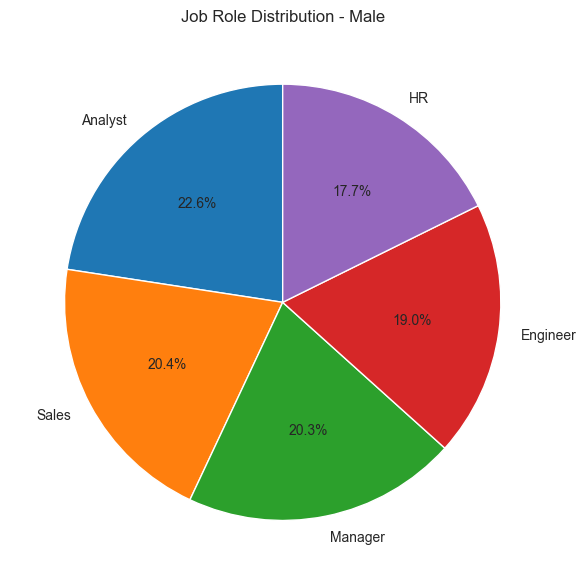

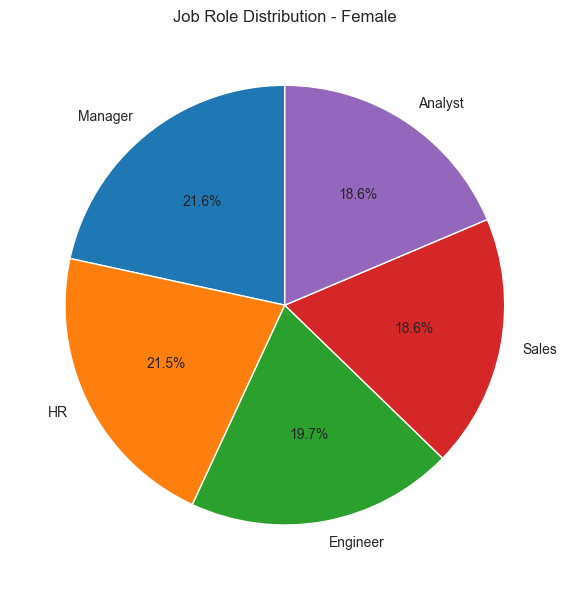

In [217]:
genders = df["Gender"].unique()
for gender in genders:
    df_gender = df[df["Gender"] == gender]
    job_counts = df_gender["JobRole"].value_counts()
    
    plt.figure(figsize=(6, 6))
    job_counts.plot(kind="pie", autopct="%1.1f%%", startangle=90)
    plt.title(f"Job Role Distribution - {gender}")
    plt.ylabel("")  # Hide y-label
    plt.tight_layout()
    plt.show()


# The Distribution Of Histogram

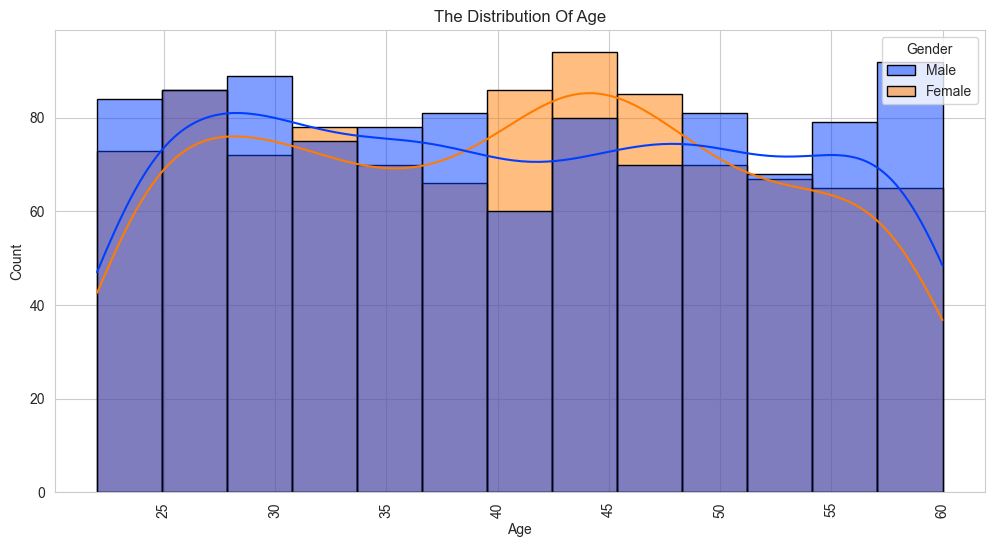

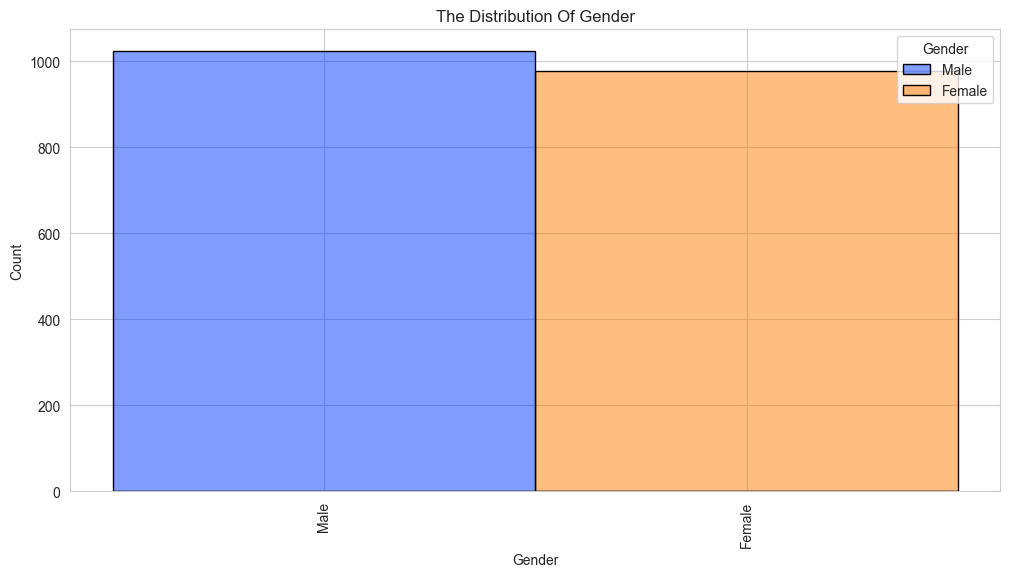

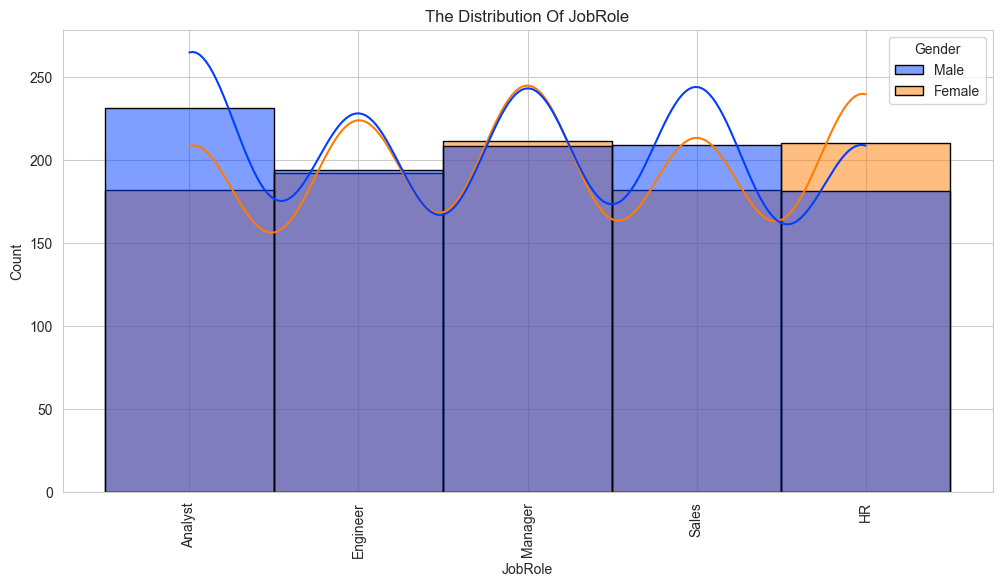

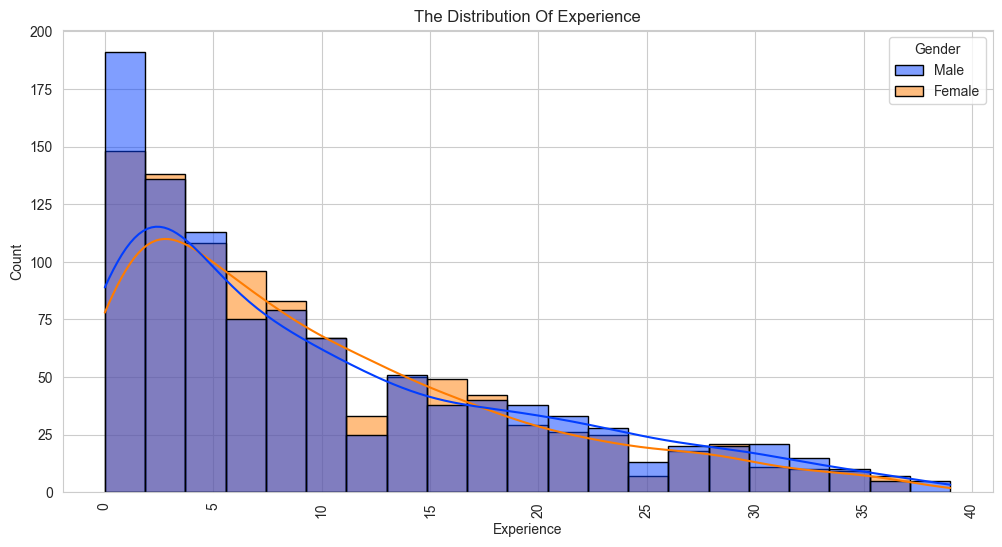

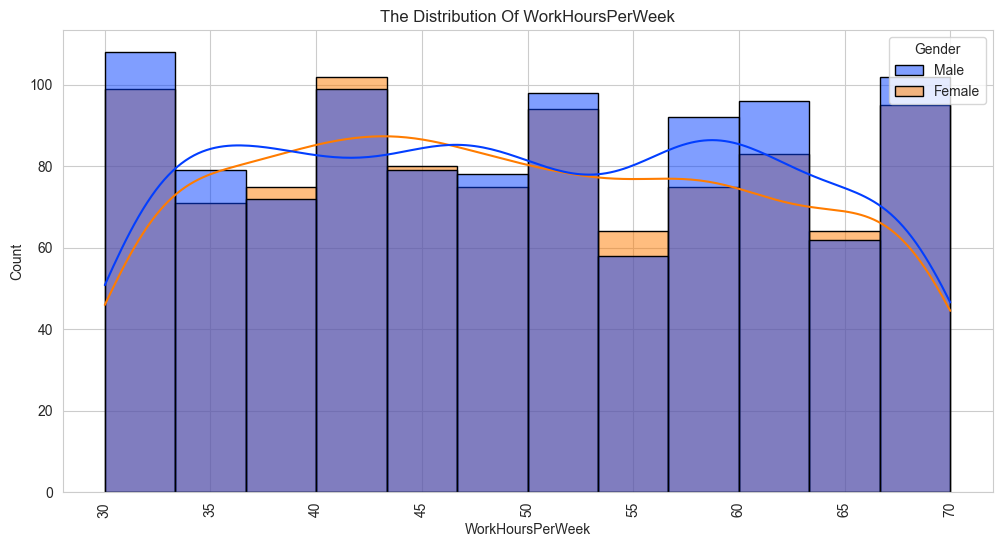

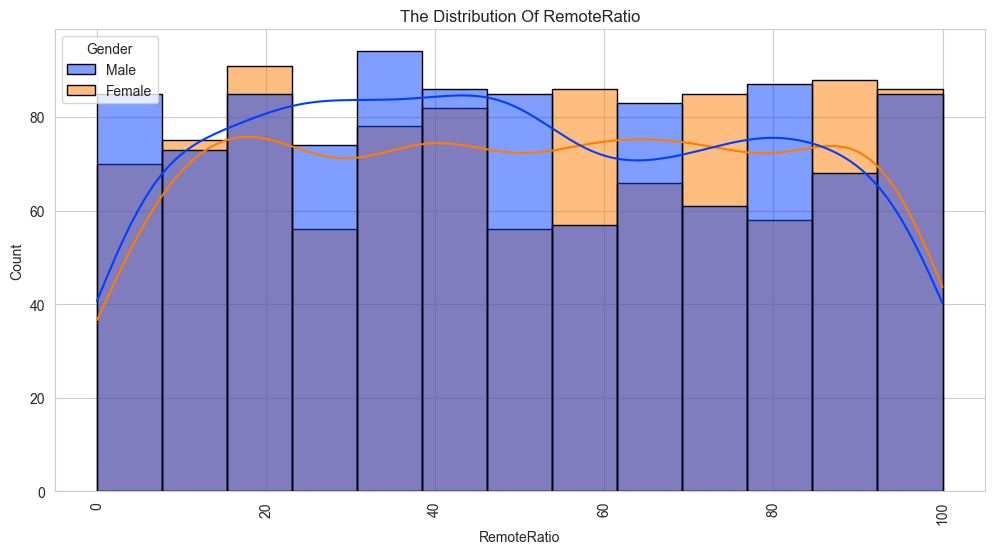

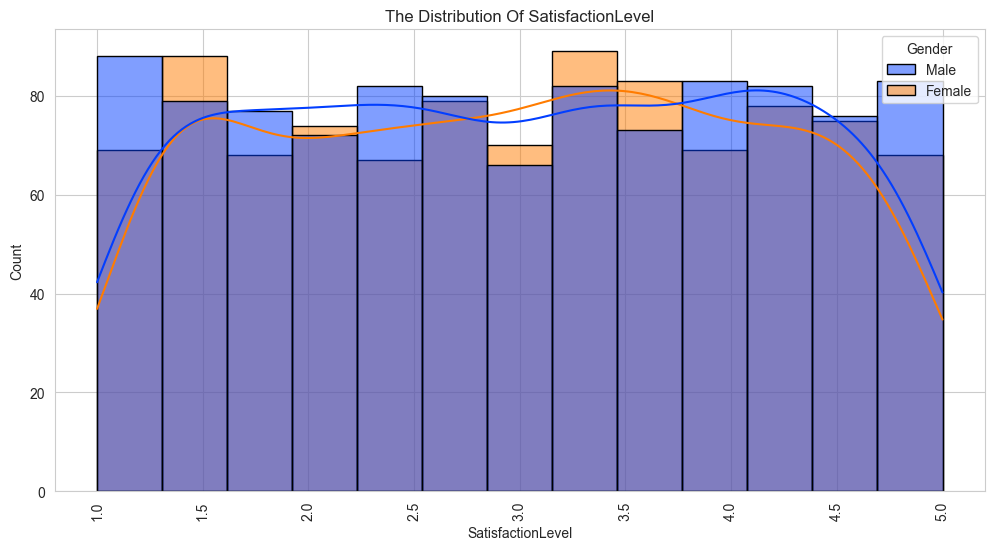

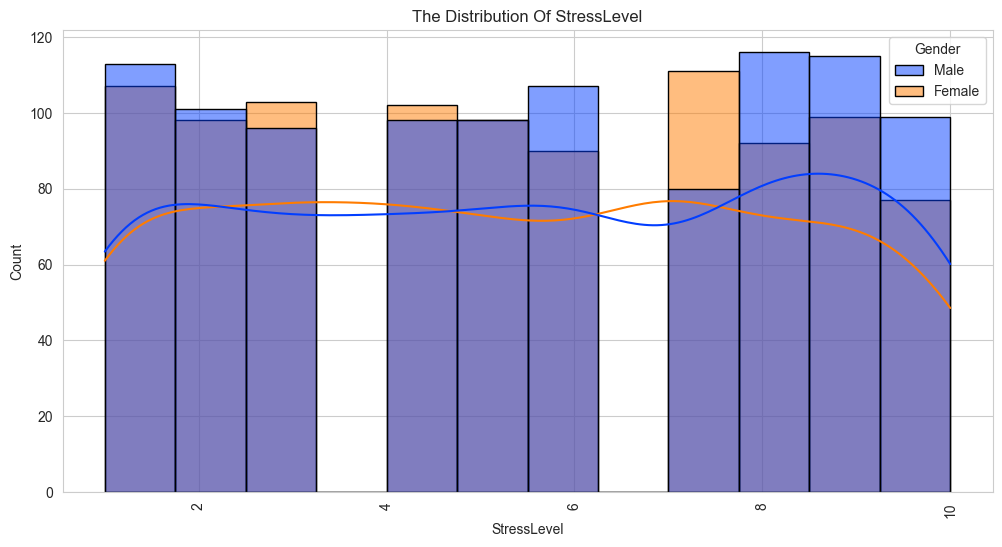

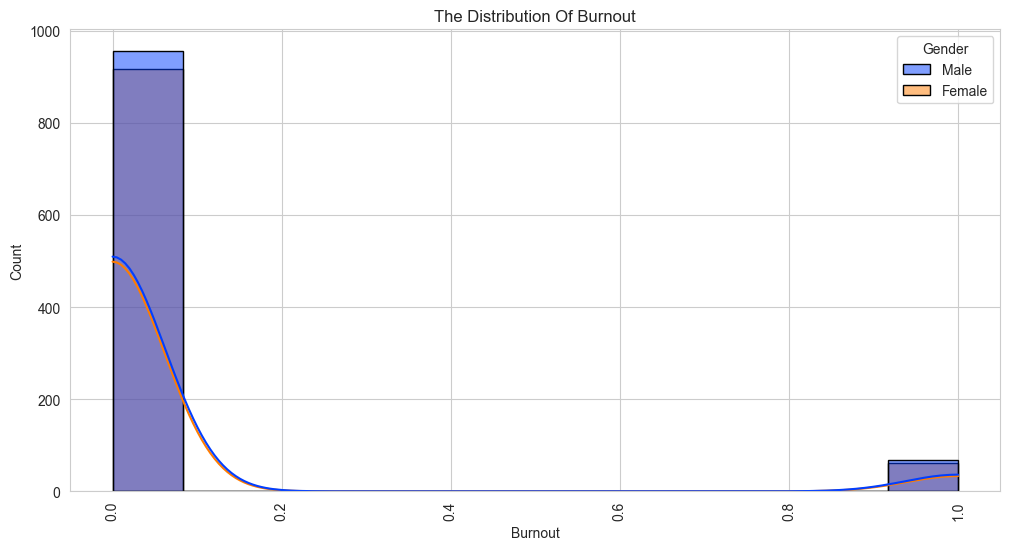

In [218]:
for col in df:
    plt.figure(figsize=(12,6))
    sns.histplot(data=df,x=col,kde=True,hue="Gender",edgecolor="black",palette="bright")
    plt.title(f"The Distribution Of {col}")
    plt.xticks(rotation=90)
    plt.show()

# Job Role Counts By Gender

In [219]:
classifi_job=df.groupby(["Gender","JobRole"]).size().reset_index(name="Count").sort_values("Count",ascending=False)
classifi_job.style.background_gradient(cmap="Reds")

,Gender,JobRole,Count
5,Male,Analyst,231
3,Female,Manager,211
2,Female,HR,210
9,Male,Sales,209
8,Male,Manager,208
6,Male,Engineer,194
1,Female,Engineer,192
0,Female,Analyst,182
4,Female,Sales,182
7,Male,HR,181


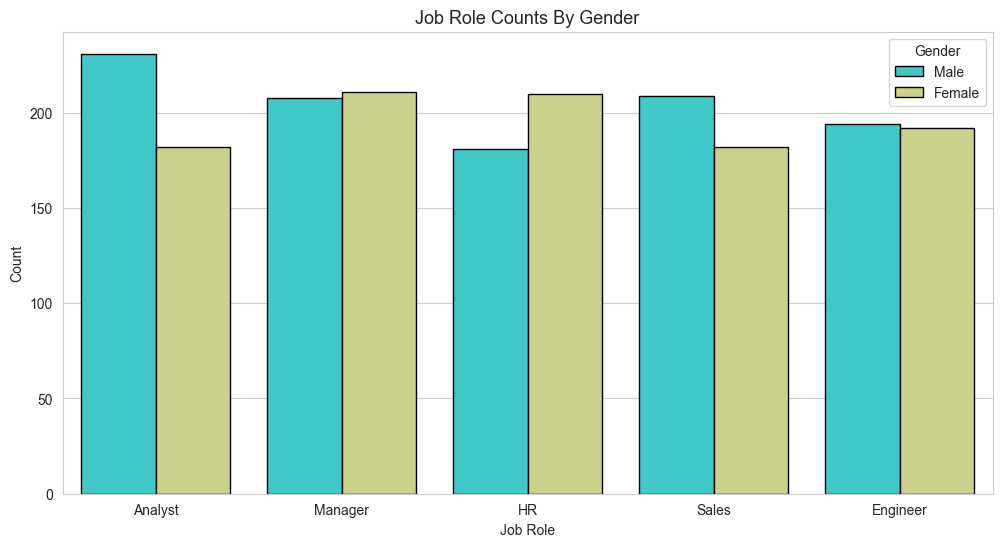

In [220]:
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
sns.barplot(data=classifi_job,x="JobRole",y="Count",hue="Gender",palette="rainbow",edgecolor="black")
plt.title("Job Role Counts By Gender",size=13)
plt.xlabel("Job Role",size=10)
plt.ylabel("Count",size=10)
plt.show()


# Average Years Experience By Job Roles And Gender

In [221]:
classifi_ex=df.groupby(["Gender","JobRole"])["Experience"].mean().reset_index()
classifi_ex.style.background_gradient(cmap="Oranges")

,Gender,JobRole,Experience
0,Female,Analyst,10.049451
1,Female,Engineer,9.281250
2,Female,HR,9.861905
3,Female,Manager,10.066351
4,Female,Sales,10.357143
5,Male,Analyst,10.437229
6,Male,Engineer,10.510309
7,Male,HR,10.276243
8,Male,Manager,10.120192
9,Male,Sales,9.775120


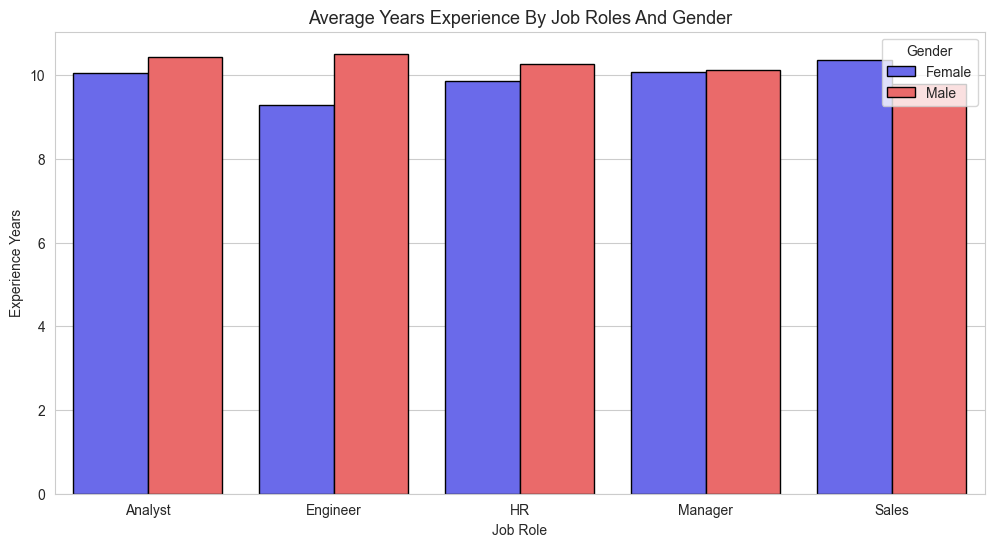

In [222]:
plt.figure(figsize=(12,6))
sns.barplot(data=classifi_ex,x="JobRole",y="Experience",hue="Gender",edgecolor="black",palette="seismic")
plt.title("Average Years Experience By Job Roles And Gender",size=13)
plt.xlabel("Job Role",size=10)
plt.ylabel("Experience Years",size=10)
plt.show()

# Average Years Experience By Job Roles And Gender

In [223]:
classifi_sa=df.groupby(["Gender","JobRole"])["SatisfactionLevel"].mean().reset_index()
classifi_sa.style.background_gradient(cmap="Greens")

,Gender,JobRole,SatisfactionLevel
0,Female,Analyst,2.862033
1,Female,Engineer,3.005677
2,Female,HR,3.023143
3,Female,Manager,3.042133
4,Female,Sales,3.018901
5,Male,Analyst,3.023420
6,Male,Engineer,2.945103
7,Male,HR,2.975028
8,Male,Manager,2.995096
9,Male,Sales,3.038612


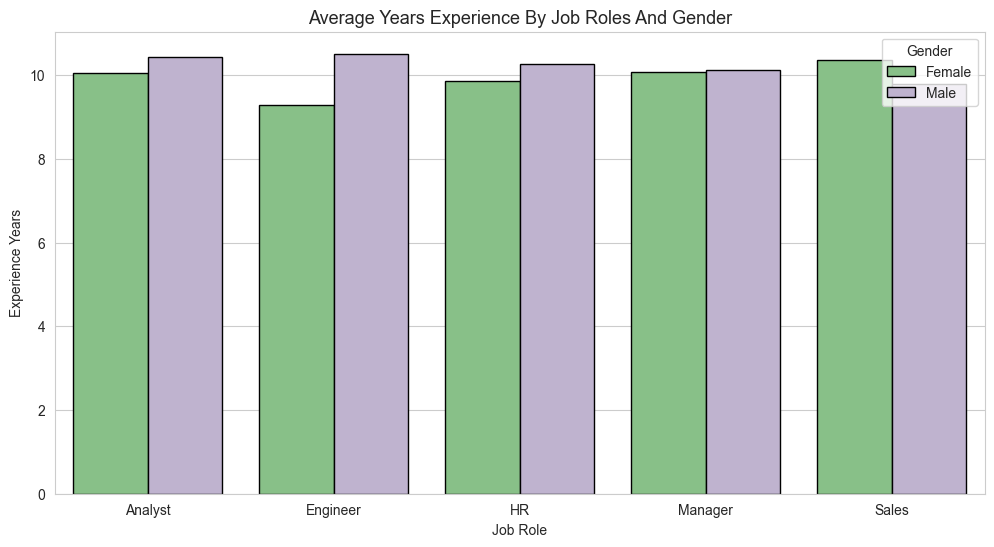

In [224]:
plt.figure(figsize=(12,6))
sns.barplot(data=classifi_ex,x="JobRole",y="Experience",hue="Gender",edgecolor="black",palette="Accent")
plt.title("Average Years Experience By Job Roles And Gender",size=13)
plt.xlabel("Job Role",size=10)
plt.ylabel("Experience Years",size=10)
plt.show()

# Remote Work By Job Roles And Gender

In [225]:
classifi_re=df.groupby(["Gender","JobRole"])["RemoteRatio"].sum().reset_index()
classifi_re.style.background_gradient(cmap="Blues")

,Gender,JobRole,RemoteRatio
0,Female,Analyst,9165
1,Female,Engineer,9894
2,Female,HR,11201
3,Female,Manager,10397
4,Female,Sales,8951
5,Male,Analyst,11363
6,Male,Engineer,10000
7,Male,HR,8640
8,Male,Manager,9860
9,Male,Sales,10475


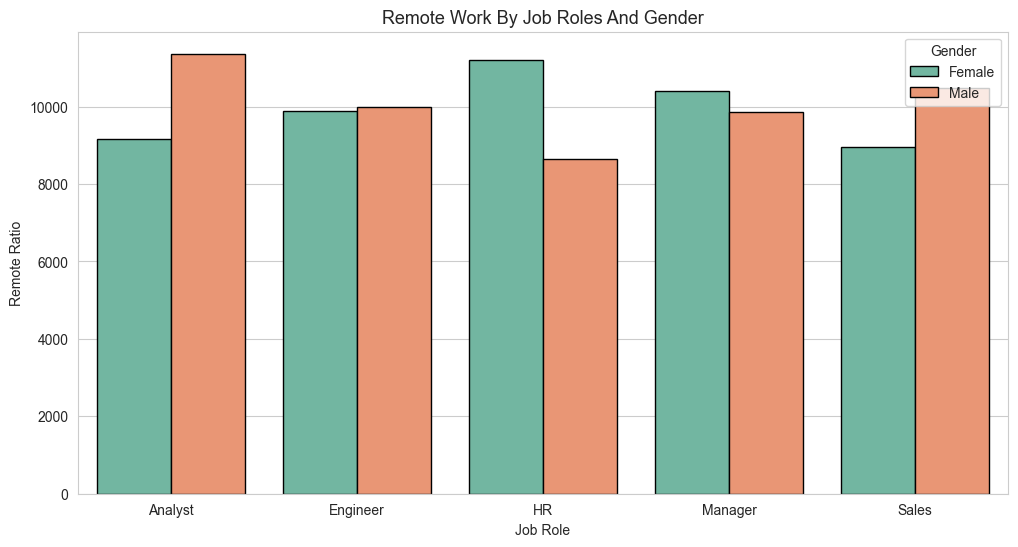

In [226]:
plt.figure(figsize=(12,6))
sns.barplot(data=classifi_re,x="JobRole",y="RemoteRatio",hue="Gender",edgecolor="black",palette="Set2")
plt.title("Remote Work By Job Roles And Gender",size=13)
plt.xlabel("Job Role",size=10)
plt.ylabel("Remote Ratio",size=10)
plt.show()

# Stress Level By Job Roles And Gender

In [227]:
classifi_st=df.groupby(["Gender","JobRole"])["StressLevel"].sum().reset_index()
classifi_st.style.background_gradient(cmap="OrRd")

,Gender,JobRole,StressLevel
0,Female,Analyst,911
1,Female,Engineer,994
2,Female,HR,1130
3,Female,Manager,1145
4,Female,Sales,1044
5,Male,Analyst,1258
6,Male,Engineer,1066
7,Male,HR,1030
8,Male,Manager,1147
9,Male,Sales,1139


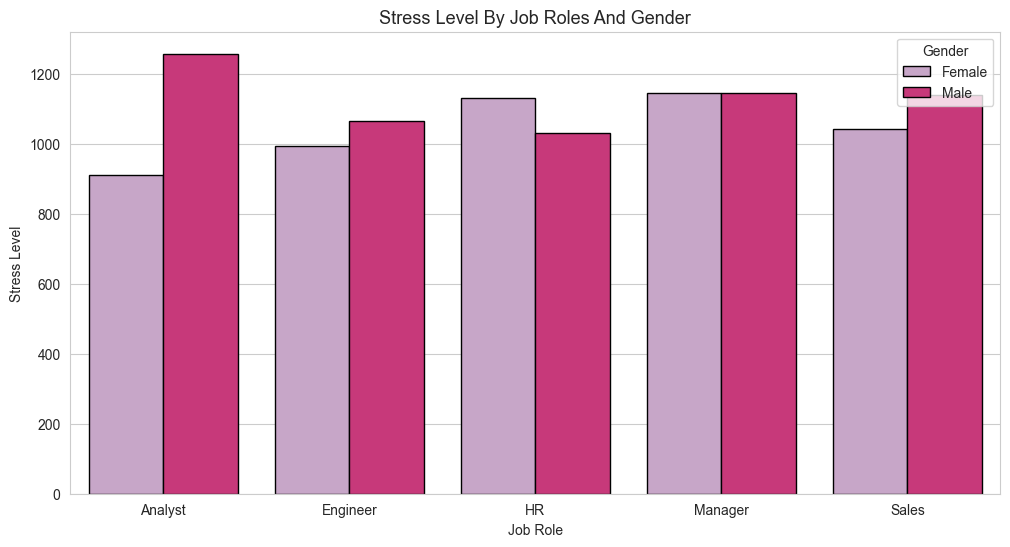

In [228]:
plt.figure(figsize=(12,6))
sns.barplot(data=classifi_st,x="JobRole",y="StressLevel",hue="Gender",edgecolor="black",palette="PuRd")
plt.title("Stress Level By Job Roles And Gender",size=13)
plt.xlabel("Job Role",size=10)
plt.ylabel("Stress Level",size=10)
plt.show()

# Burnout Level By Job Roles And Gender

In [229]:
classifi_br=df.groupby(["Gender","JobRole"])["Burnout"].sum().reset_index()
classifi_br.style.background_gradient()

,Gender,JobRole,Burnout
0,Female,Analyst,10
1,Female,Engineer,8
2,Female,HR,16
3,Female,Manager,15
4,Female,Sales,12
5,Male,Analyst,10
6,Male,Engineer,17
7,Male,HR,10
8,Male,Manager,13
9,Male,Sales,18


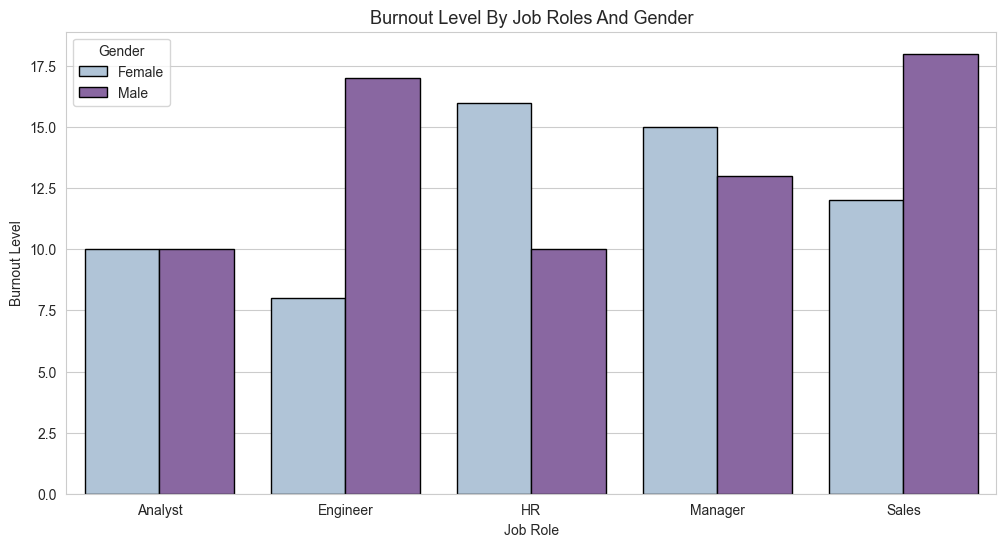

In [230]:
plt.figure(figsize=(12,6))
sns.barplot(data=classifi_br,x="JobRole",y="Burnout",hue="Gender",edgecolor="black",palette="BuPu")
plt.title("Burnout Level By Job Roles And Gender",size=13)
plt.xlabel("Job Role",size=10)
plt.ylabel("Burnout Level",size=10)
plt.show()

# Correlation Heatmap

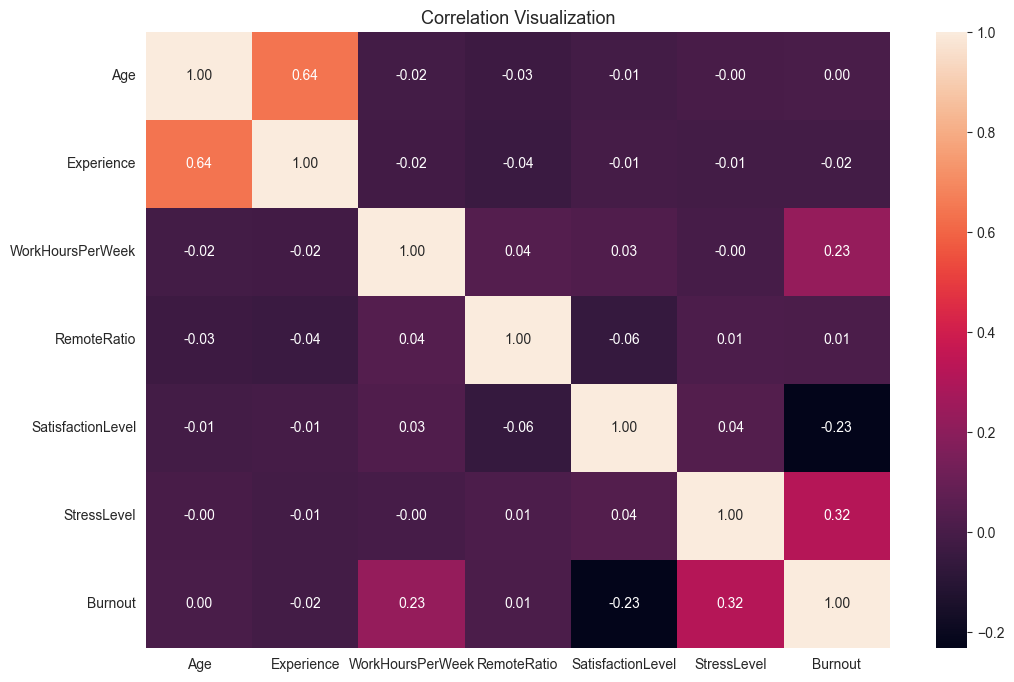

In [234]:
cor=df.select_dtypes(include="number").corr()
plt.figure(figsize=(12,8))
sns.heatmap(data=cor,annot=True,fmt=".2f")
plt.title("Correlation Visualization",size=13)
plt.show()